In [1]:
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
# from adjustText import adjust_text
from Bio import SeqIO
from Bio.Seq import Seq
%matplotlib inline

import scipy

from itertools import combinations

sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()

from matplotlib import gridspec
from matplotlib.gridspec import GridSpec

import os
import sys

home_dir = '~/Documents/Stanford/Research/EvolvingFront/'
home_dir = os.path.expanduser(home_dir)

tools_path = f'{home_dir}/code/processing/tools/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools as tools



# sns.set_style('dark')
# sns.set_style('ticks')
# plt.style.use('dark_background')

We want to infer the DFE for each starting genotype from each evolution condition. 

For practice, let's start with the data from Levy 2015

In [19]:
from matplotlib.collections import LineCollection

def multiline(xs, ys, c, ax=None, **kwargs):
    """Plot lines with different colorings

    Parameters
    ----------
    xs : iterable container of x coordinates
    ys : iterable container of y coordinates
    c : iterable container of numbers mapped to colormap
    ax (optional): Axes to plot on.
    kwargs (optional): passed to LineCollection

    Notes:
        len(xs) == len(ys) == len(c) is the number of line segments
        len(xs[i]) == len(ys[i]) is the number of points for each line (indexed by i)

    Returns
    -------
    lc : LineCollection instance.
    """

    # find axes
    ax = plt.gca() if ax is None else ax

    # create LineCollection
    segments = [np.column_stack([x, y]) for x, y in zip(xs, ys)]
    lc = LineCollection(segments, **kwargs)

    # set coloring of line segments
    #    Note: I get an error if I pass c as a list here... not sure why.
    lc.set_array(np.asarray(c))

    # add lines to axes and rescale 
    #    Note: adding a collection doesn't autoscalee xlim/ylim
    ax.add_collection(lc)
    ax.autoscale()
    return lc

In [266]:
condition_properties = {
#                         'Evo1D_IRAs':{1:[0,1,4,7,10,13,16,19,22,24],
#                                       2:[0,1,4,7,10,13,16,19,22,24]},
#                         'Evo1D_TCG':{1:[0,1,4,8,10,13,16,19,22,24],
#                                     2:[0,1,4,8,10,13,16,19,22,24]},
                        
                        'Evo2D_Ira1_Mis':{1:[0,1,4,7,10,13,17,21,25],
                                         2:[0,1,4,7,10,13,17,21,25]},
                        'Evo2D_Ira1_Non':{1:[0,1,4,7,10,13,17,21,25],
                                         2:[0,1,4,7,10,13,17,21,25]},
                        
                        'Evo3D_Ira1_Mis':{1:[0,1,4,7,10,14,17,21],
                                         2:[0,1,4,7,10,14,17,21],
                                         3:[0,1,4,7,10,14,17,21]},
                        'Evo3D_Ira1_Non':{1:[0,1,4,7,10,14,17,21],
                                         2:[0,1,4,7,10,14,17,21],
                                         3:[0,1,4,7,10,14,17,21]},
                        
#                         'Evo3D_TCG':{1:[0,1,4,7,10,14,17,21],
#                                          2:[0,1,4,7,10,14,17,21]},               
                       }

# condition_properties = {'Levy2015':{1:[0,16,32,40,48,64,72,80,88,96,104,112],
#                                    2:[0,8,24,40,48,56,64,72,88,96] }}


n_gens = 8
effective_n = 6 * 10**8 
# effective_lineage_size = 

cov_thresh = 1e5

program_used = 'fitmut2'

if program_used == 'fitmut1':
    
    figure_directory = 'figures/fitmut1/'
    result_directory = 'FitMut2_processing/out_thresholded_fitmut1/'
    
elif program_used == 'fitmut2':
    figure_directory = 'figures/'
    result_directory = 'FitMut2_processing/out_thresholded/'




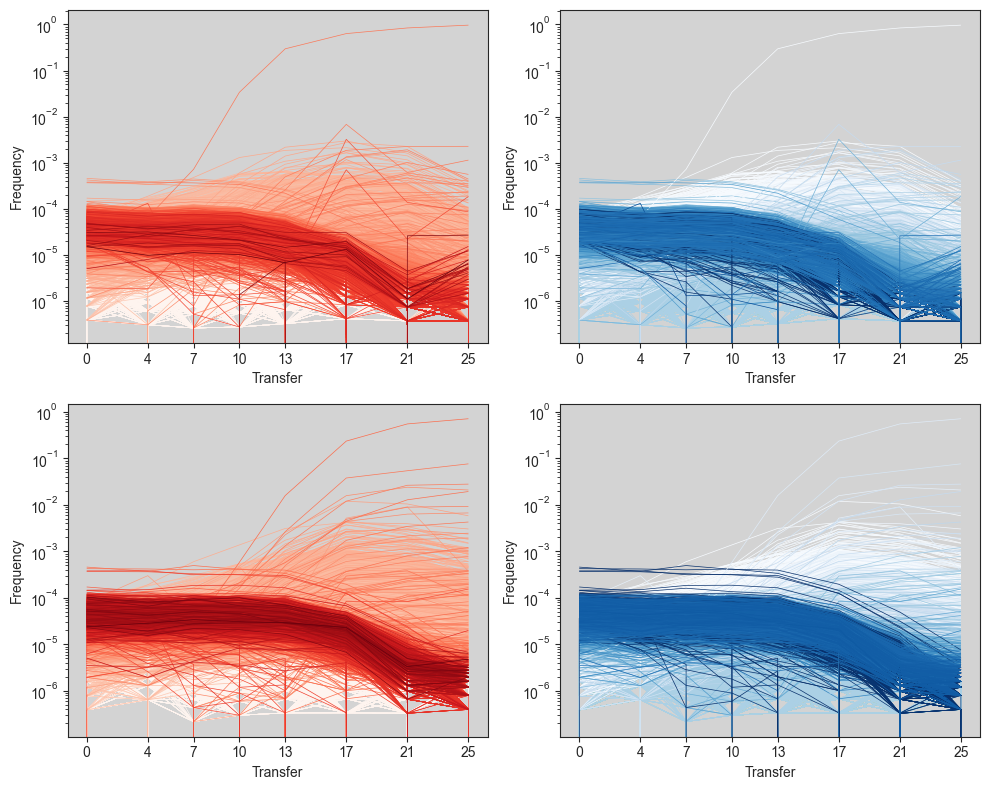

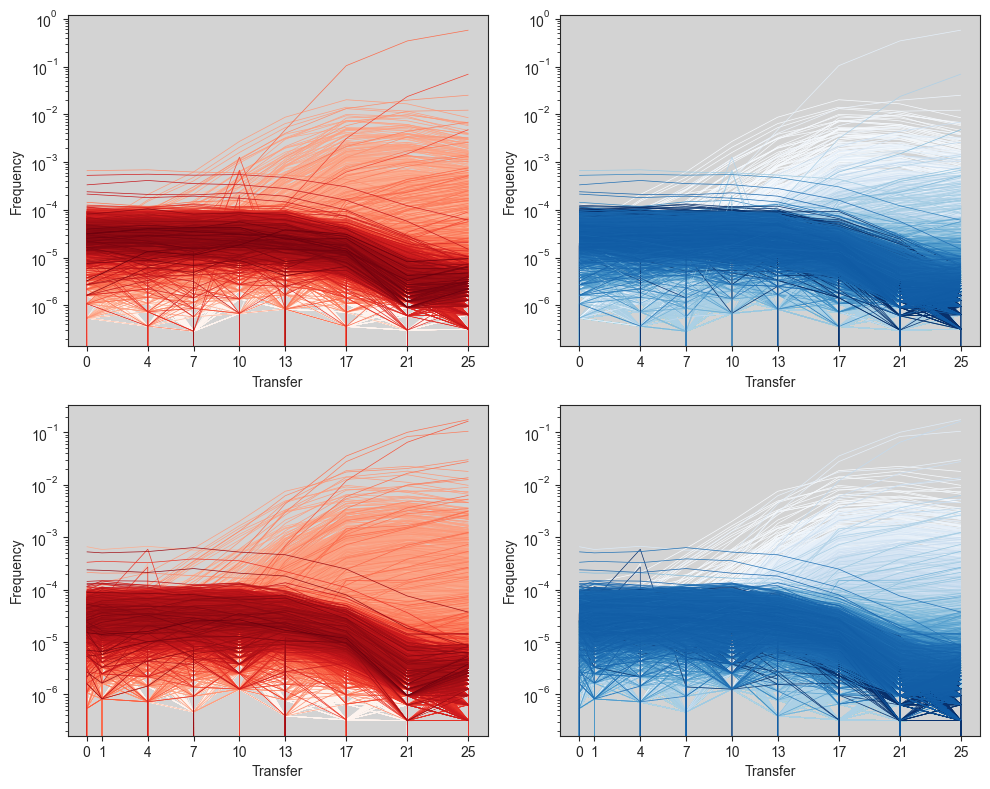

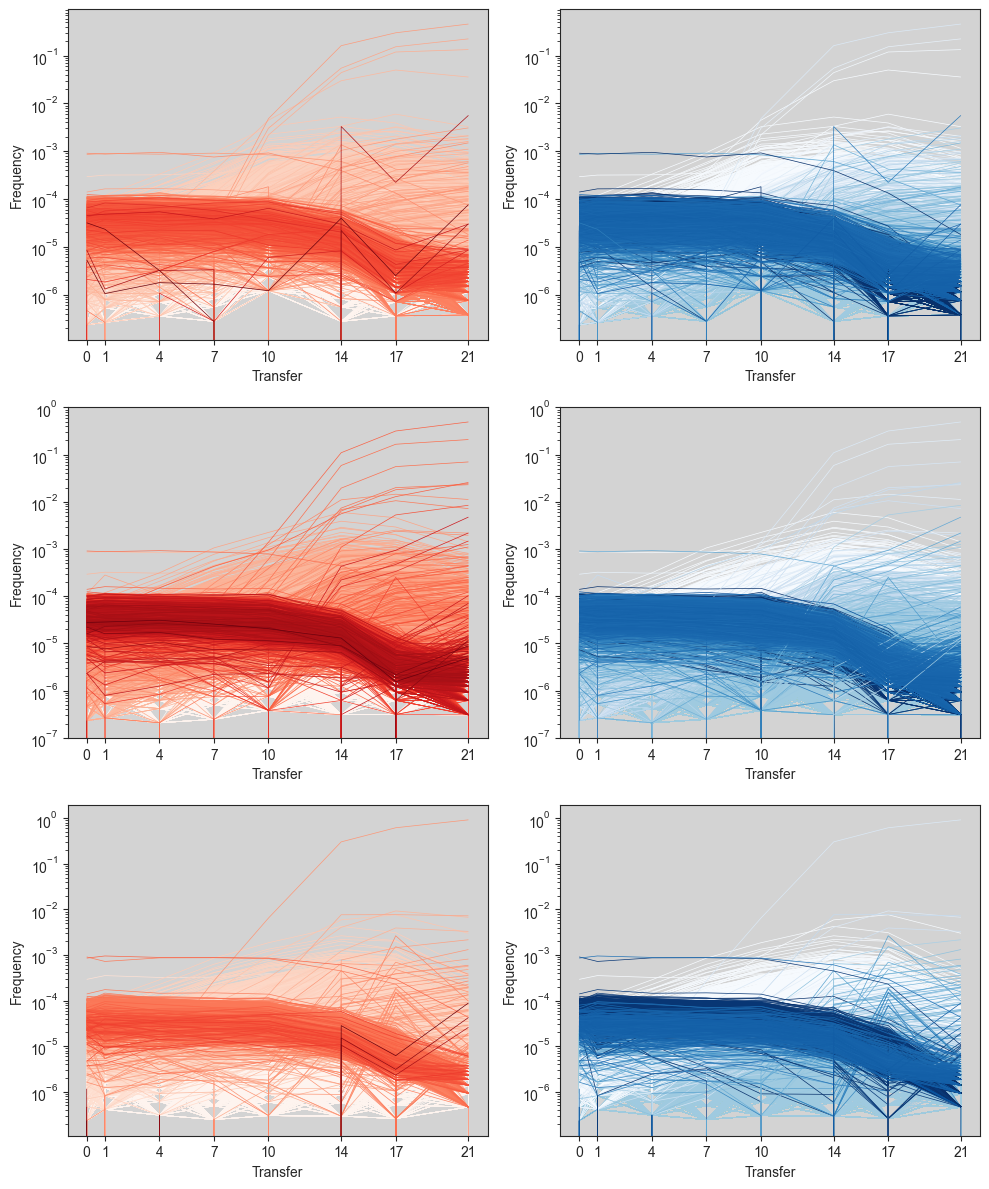

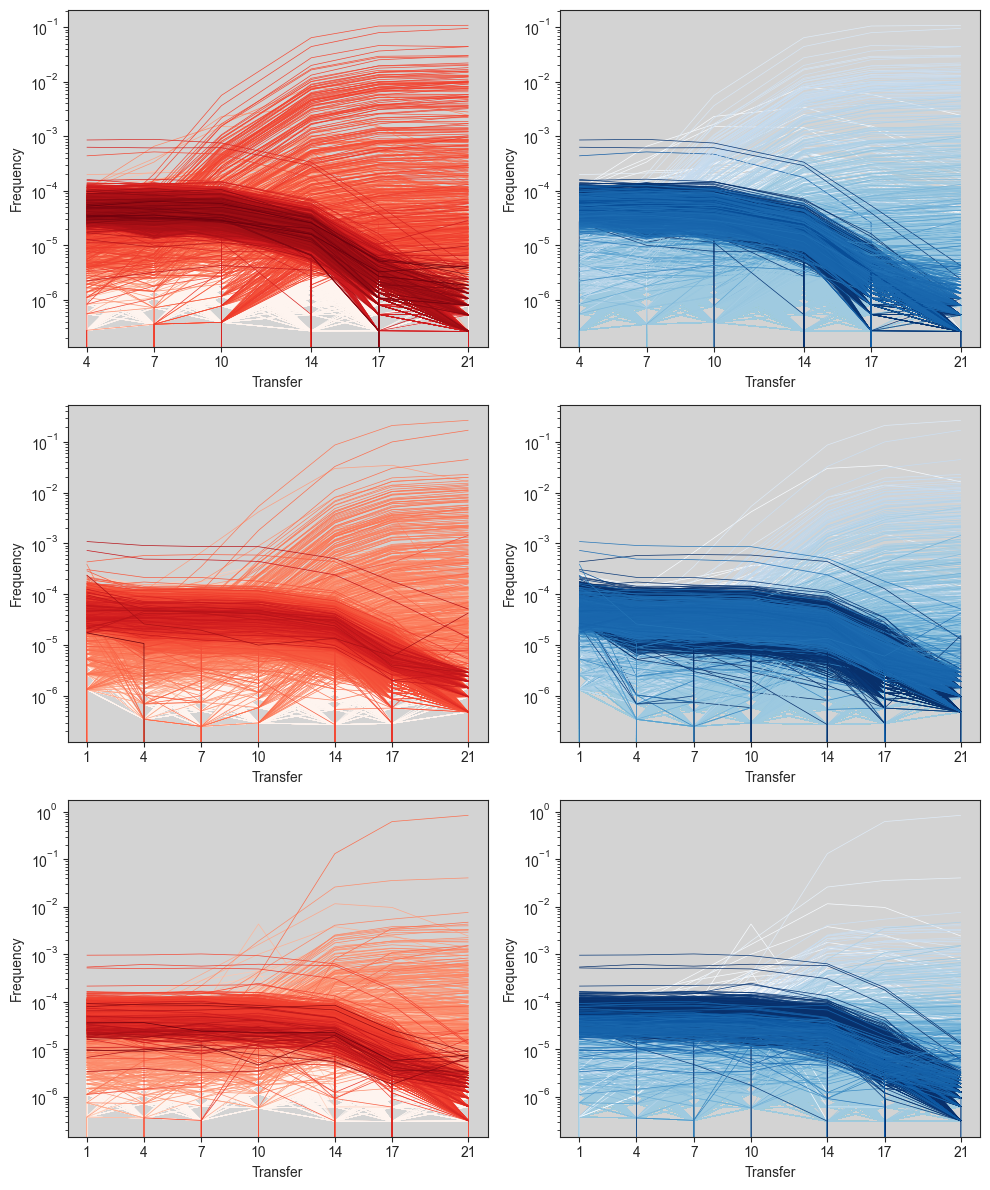

In [267]:
condition_colors = {key:sns.color_palette()[i] for i,key in enumerate(condition_properties.keys())}


# condition_properties = {'Evo3D_Ira1_Non':{1:[0,1,4,7,10,14,17,21],
#                                          2:[0,1,4,7,10,14,17,21],
#                                          3:[0,1,4,7,10,14,17,21]}}


fitmuts_big = {}
mean_fitness_big = {}
kappas_big = {}
mutant_cell_fraction_big = {}
used_timepoints_big = {}
freqs_big = {}

for condition,reps in condition_properties.items():
    
    traj_fig,traj_ax = plt.subplots(figsize=(10,4*len(reps)),nrows=len(reps),ncols=2)
    
    this_data = p.read_csv(f'{condition}_counts_curated.csv')

    for rep,timepoints in reps.items():
#         this_data = p.read_csv(f'{condition}_{rep}_counts_original.csv')
        
        used_timepoints = []
        all_samples = []
#         for time in timepoints:
#             if time == 0:
#                 all_samples.append(f't={time}')
#             else:
#                 all_samples.append(f't={time}')
        for time in timepoints:
            if time == 0:
                sample_name = f'{condition}_0_0_count'
#                 all_samples.append()
            else:
                sample_name = f'{condition}_{rep}_{time}_count'
            
            if np.sum(this_data[sample_name]) > cov_thresh:
                
                all_samples.append(sample_name)
                used_timepoints.append(time)
                
        used_timepoints_big[f'{condition}_{rep}'] = used_timepoints

#         this_fit_mut = p.read_csv(f'FitMut2_processing/out_fitmut1_thresholded/{condition}_{rep}_MutSeq_Result.csv')
        this_fit_mut = p.read_csv(f'{result_directory}{condition}_{rep}_MutSeq_Result.csv')
        fitmuts_big[f'{condition}_{rep}'] = this_fit_mut

        mean_fitness = this_fit_mut['Mean_Fitness'].values
        mean_fitness = mean_fitness[~np.isnan(mean_fitness)]
        mean_fitness_big[f'{condition}_{rep}'] = mean_fitness

        kappas = this_fit_mut['Kappa_Value'].values
        kappas = kappas[~np.isnan(kappas)]
        kappas_big[f'{condition}_{rep}'] = kappas


        mutant_cell_fraction = this_fit_mut['Mutant_Cell_Fraction'].values
        mutant_cell_fraction = mutant_cell_fraction[~np.isnan(mutant_cell_fraction)]
        mutant_cell_fraction_big[f'{condition}_{rep}'] = mutant_cell_fraction

        this_fit_mut = this_fit_mut[['Fitness','Establishment_Time','Error_Fitness','Error_Establishment_Time']]
#         this_fit_mut['barcode'] = this_mut
        
        fitness_order = np.argsort(this_fit_mut['Fitness'].values)
        
        these_ts = np.tile(used_timepoints,this_data[all_samples].shape[0]).reshape(this_data[all_samples].shape)
        these_freqs = (this_data[all_samples]/np.nansum(this_data[all_samples],axis=0)).values
        
        freqs_big[f'{condition}_{rep}'] = these_freqs
        
        
        
        these_freqs = these_freqs[fitness_order,:]
        
#         traj_fit.add_subplot()

        lc = multiline(these_ts,these_freqs, 
                       this_fit_mut['Fitness'].values[fitness_order], ax=traj_ax[rep-1,0],
                       cmap='Reds', lw=0.5)

#         axcb = traj_fig.colorbar(lc)
#         axcb.set_label('Fitness')

        traj_ax[rep-1,0].set_yscale('log')
        traj_ax[rep-1,0].set_xticks(used_timepoints,used_timepoints)
        
        traj_ax[rep-1,0].set_xlabel('Transfer')
        traj_ax[rep-1,0].set_ylabel('Frequency')

#         traj_fit.add_subplot()

        traj_ax[rep-1,0].set_facecolor('lightgrey')

        lc = multiline(these_ts,these_freqs, 
                       this_fit_mut['Establishment_Time'].values[fitness_order], ax=traj_ax[rep-1,1],
                       cmap='Blues', lw=0.5)

        traj_ax[rep-1,1].set_yscale('log')
        traj_ax[rep-1,1].set_xticks(used_timepoints,used_timepoints)
        
        traj_ax[rep-1,1].set_xlabel('Transfer')
        traj_ax[rep-1,1].set_ylabel('Frequency')
        
        traj_ax[rep-1,1].set_facecolor('lightgrey')
        
    
    traj_fig.tight_layout()
    traj_fig.savefig(f'{figure_directory}{condition}_trajectories_fitness_establishment.pdf',bbox_inches='tight')
#     traj_fig.savefig(f'figures/fitmut1/{condition}_trajectories_fitness_establishment.pdf',bbox_inches='tight')




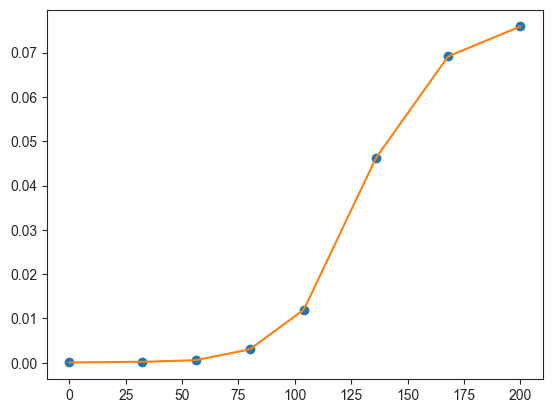

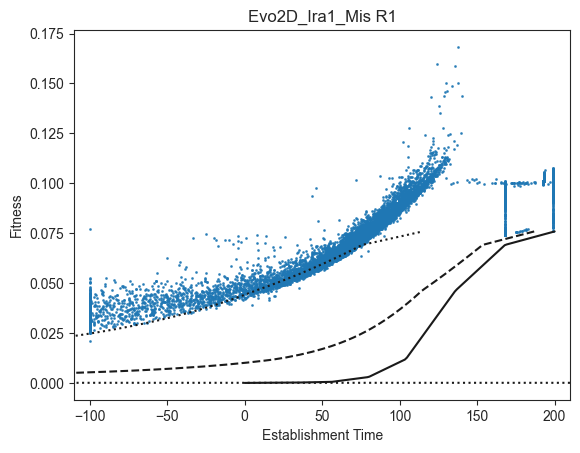

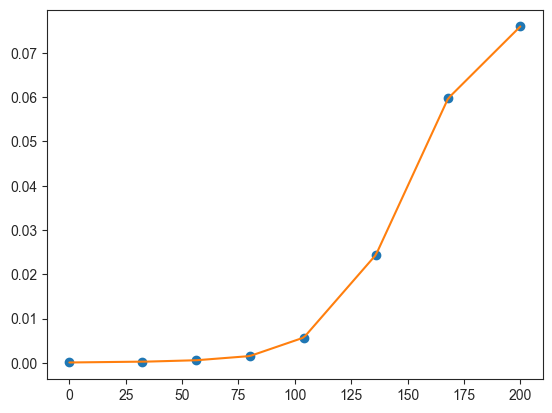

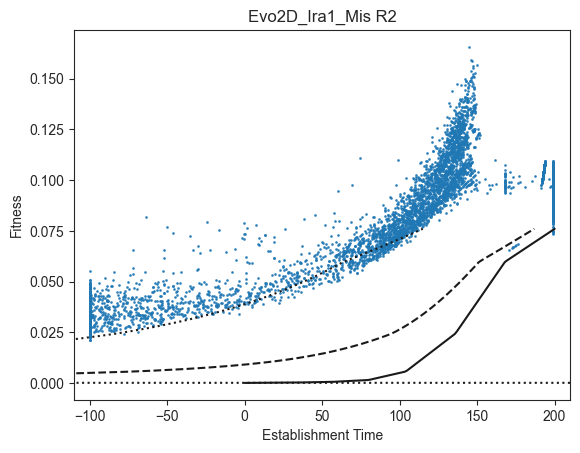

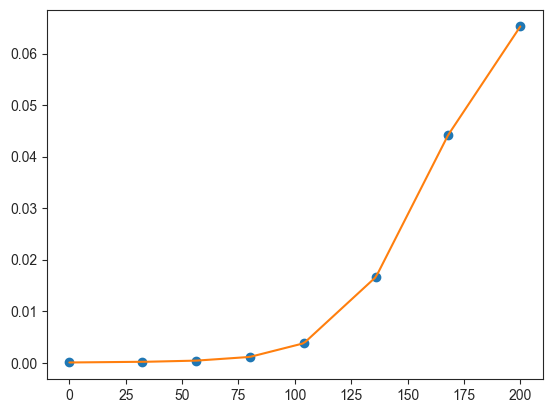

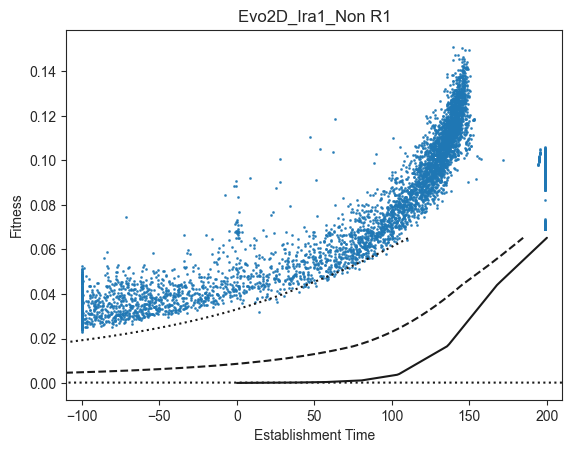

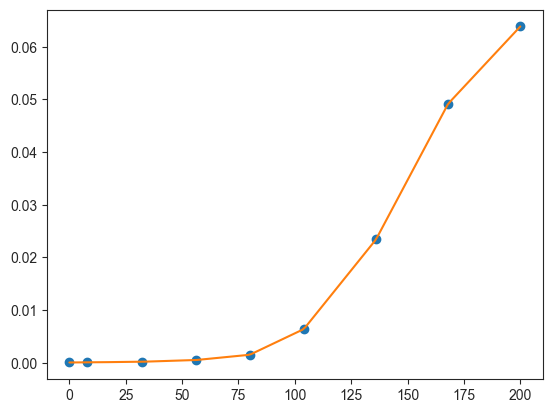

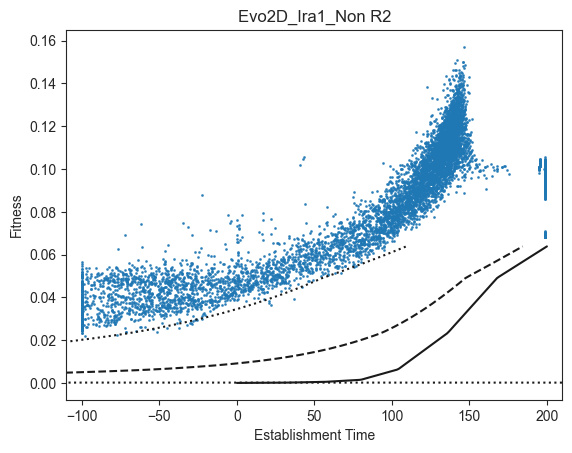

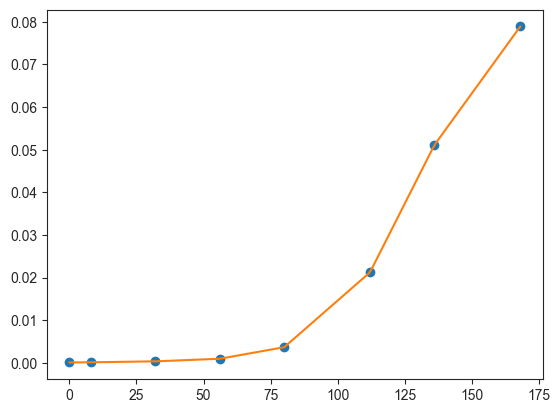

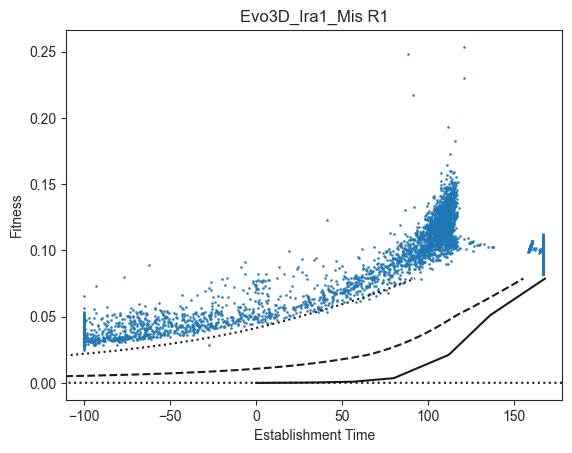

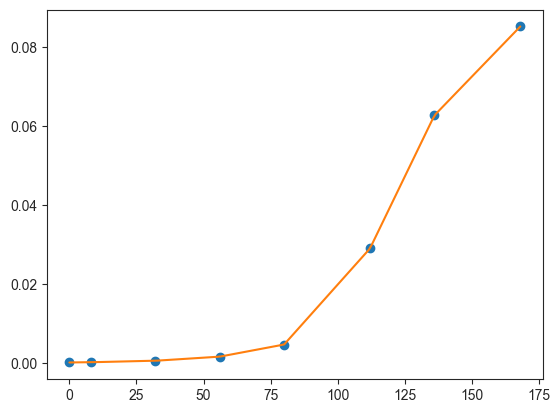

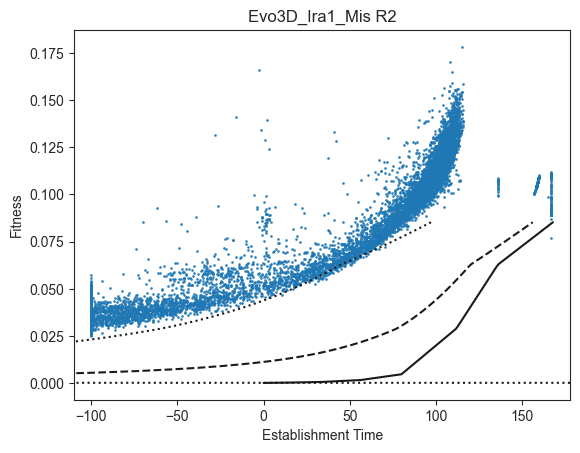

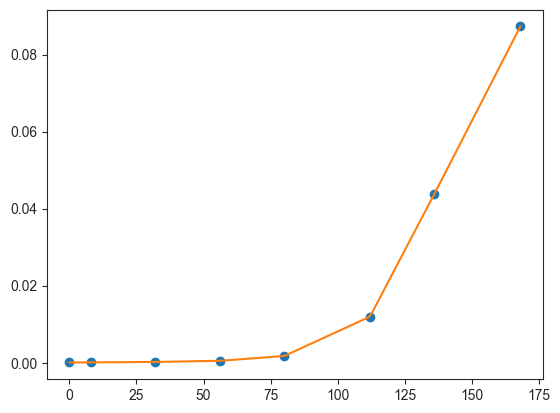

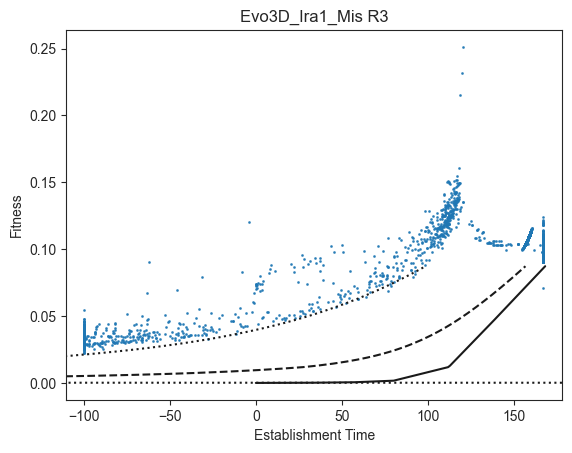

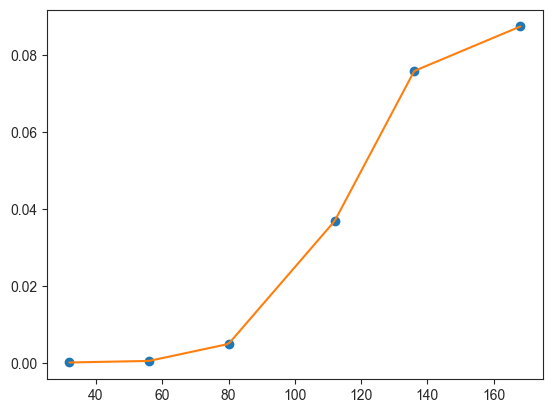

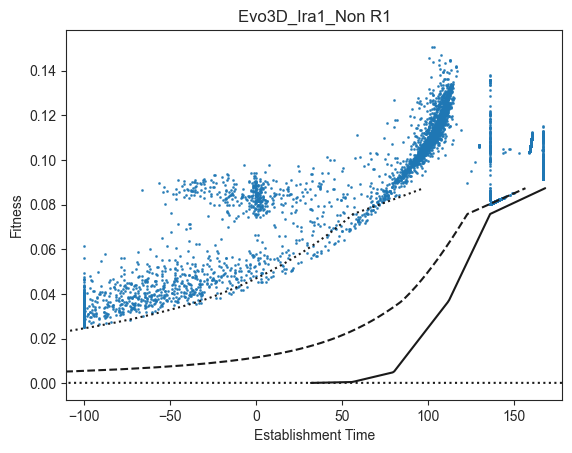

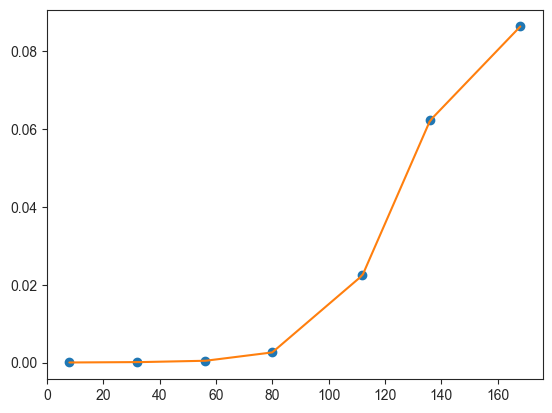

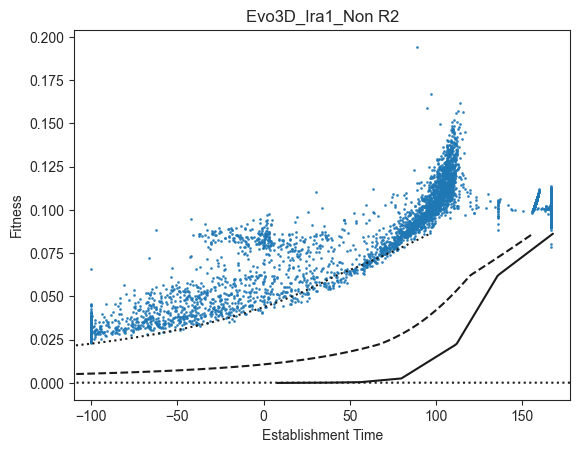

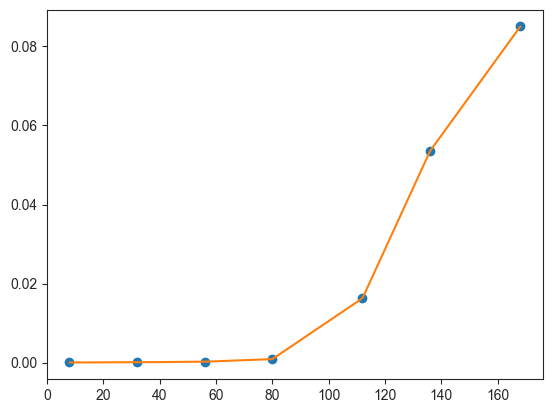

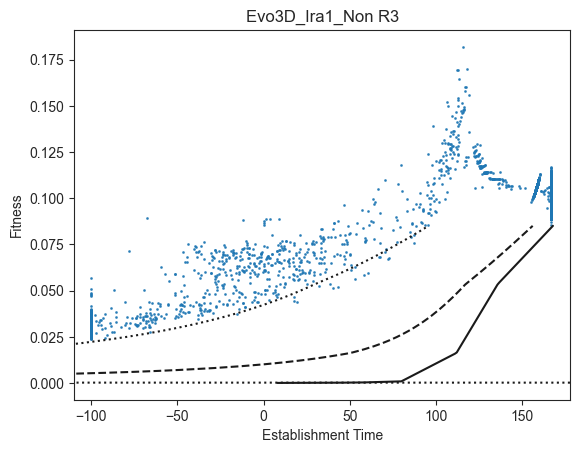

In [268]:
# adaptive_ix = np.where(this_fit_mut['Fitness'] > 0 )[0]

for condition,reps in condition_properties.items():
    
#     shared_list = []
    
    for rep,timepoints in reps.items():

        this_fit_mut = fitmuts_big[f'{condition}_{rep}']
        mean_fitness = mean_fitness_big[f'{condition}_{rep}']
        used_timepoints = used_timepoints_big[f'{condition}_{rep}']
        
        used_timepoints = 8*np.asarray(used_timepoints)
        
        effective_lineage_size = effective_n/len(this_fit_mut)
        
         
        adaptives = this_fit_mut[this_fit_mut['Fitness'] > 0]
        
        interpolationf = scipy.interpolate.interp1d(used_timepoints,mean_fitness,kind=1)

        ts = np.linspace(used_timepoints[0],used_timepoints[-1],150)

        mean_fitness_est = interpolationf(ts)

        s_vals = mean_fitness_est
        ts_clonal = [ts[i]-(1/sval) for i,sval in enumerate(s_vals)]
        ts_clonal_size = [ts[i]-(1/sval)*np.log(effective_lineage_size*sval) for i,sval in enumerate(s_vals)]
        
        plt.figure()
        
        plt.plot(used_timepoints,mean_fitness,'o')
        plt.plot(ts,mean_fitness_est)
        
        plt.figure()
        plt.title(f'{condition} R{rep}')
        

        # last_t_count = this_data[]

        plt.scatter(adaptives['Establishment_Time'],adaptives['Fitness'],alpha=0.8,s=1)

        # used_timepoints = [8,32,56,80,112,136,168]

        # ts = 

        # plt.plot(8*np.asarray(timepoints[2:]),mean_fitness,color='k')
        # plt.plot(used_timepoints[:-1],mean_fitness,color='k')
        # plt.plot(ts_clonal,mean_fitness,color='k',linestyle='--')
        # plt.plot(ts_clonal_size,mean_fitness,color='k',linestyle=':')

        plt.plot(ts,mean_fitness_est,color='k')
        plt.plot(ts_clonal,mean_fitness_est,color='k',linestyle='--')
        plt.plot(ts_clonal_size,mean_fitness_est,color='k',linestyle=':')

        plt.xlim(np.min(adaptives['Establishment_Time'])-10,used_timepoints[-1]+10)

        plt.xlabel('Establishment Time')
        plt.ylabel('Fitness')

# plt.savefig(f'figures/fitmut1/{condition}_{rep}_Establishment_vs_Fitness_lined.pdf',bbox_inches='tight')

In [69]:

# Eq.  (Line 292 of mathematica)
def establishment_size(s,t,interpolated_mean_fitness,delta_s):
    
    return (1/(s-interpolated_mean_fitness(t)) * np.heaviside(s-(interpolated_mean_fitness(t)+delta_s)) 
            + (1/delta_s)* np.heaviside(-(s-(interpolated_mean_fitness(t)+delta_s))) 
    

[0, 4, 7, 10, 13, 17, 21, 25]

In [146]:
from scipy.optimize import fsolve

def mu_func(mu,s,delta_s,f,t,N_f=10**12):
    
    return mu*delta_s * (1 + s *np.log(N_f*mu*delta_s)) - f * s/(np.exp(s*t))

def mu_error(mu,delta_s,Ne=6*10**8):
    
    return np.sqrt(mu*delta_s/Ne)

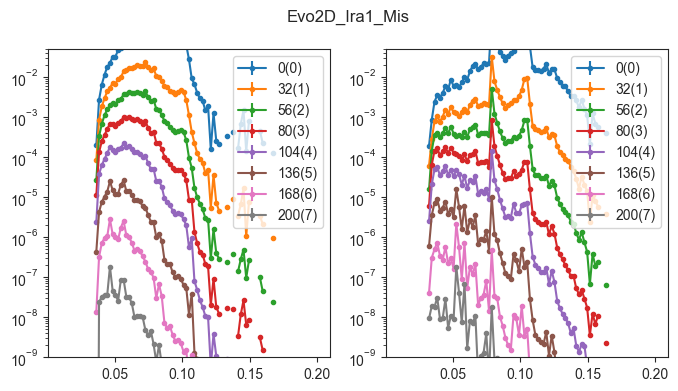

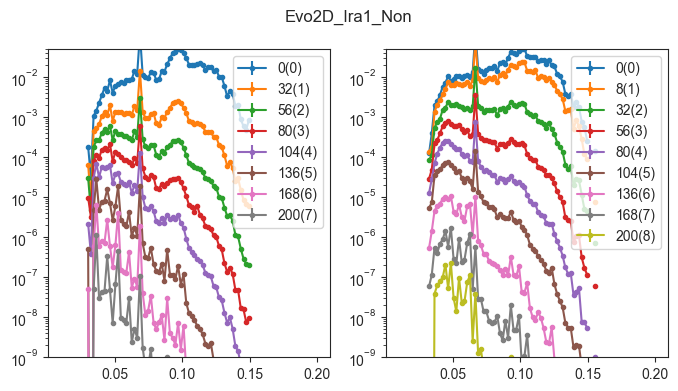

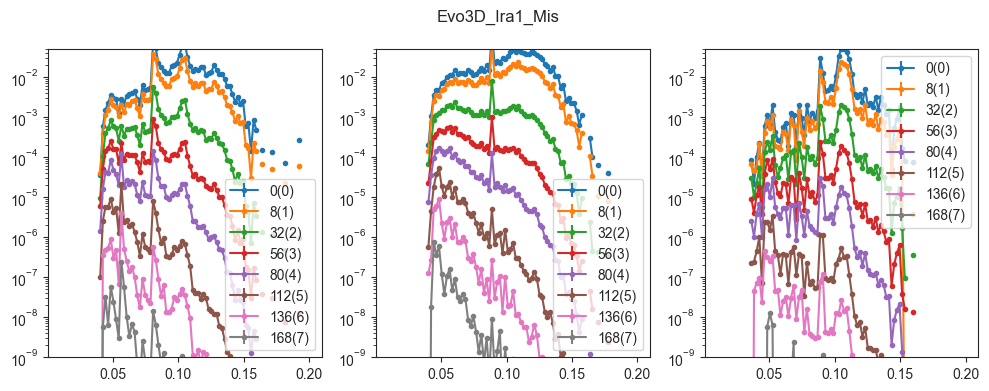

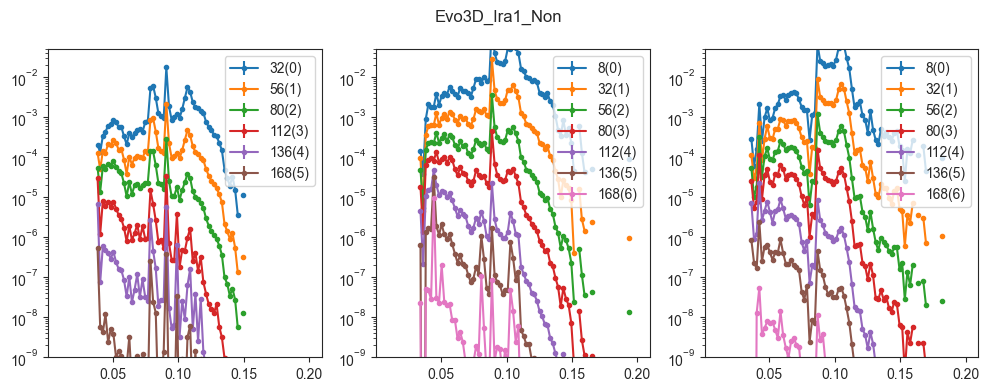

In [270]:
delta_s = 0.002

s_min = 0.01
s_max = 0.2

s_space = np.linspace(s_min,s_max,int((s_max-s_min)/delta_s))

N_f = 10**12

# chosen_transfer = 5

# chosen_timepoint = 32

for condition,reps in condition_properties.items():
    plt.figure(figsize=(4*len(reps),4))
    plt.suptitle(condition)
    
    for rep,timepoints in reps.items():
        
        this_fit_mut = fitmuts_big[f'{condition}_{rep}']
        mean_fitness = mean_fitness_big[f'{condition}_{rep}']
        used_timepoints = used_timepoints_big[f'{condition}_{rep}']
        these_freqs = freqs_big[f'{condition}_{rep}']
        
        used_timepoints = 8*np.asarray(used_timepoints)
        
         
        adaptives = this_fit_mut[this_fit_mut['Fitness'] > 0]
        adaptives = adaptives[adaptives['Establishment_Time']>-20]
        
        
    
        plt.subplot(1,len(reps),rep)

        for chosen_transfer in range(len(used_timepoints)):
            mus = []
            mu_errors = []
            for s in s_space:

                adaptives_here = adaptives[adaptives['Fitness'].between(s,s+delta_s)]

                interval_lineages = np.where(adaptives['Fitness'].between(s,s+delta_s))[0]

                freqs_here = these_freqs[interval_lineages,chosen_transfer]

                if len(adaptives_here) > 0:

                    out = fsolve(func,(1),args=(s,delta_s,np.sum(freqs_here),used_timepoints[chosen_transfer],N_f))
                    err = mu_error(out,delta_s)
                    mus.append(out[0])
                    mu_errors.append(err[0])
                else:

                    mus.append(np.nan)
                    mu_errors.append(np.nan)


            plt.errorbar(s_space,mus,
                         yerr=mu_errors,
                         marker='.',
                         linestyle='-',
                         label=f'{used_timepoints[chosen_transfer]}({chosen_transfer})')
        plt.legend()
        plt.yscale('log')
        
        plt.ylim(10**-9,5*10**-2)
        
    plt.savefig(f'{figure_directory}/mutation_rate_spectrum_deterministic_by_time_{condition}.pdf',bbox_inches='tight')
        

In [211]:
# used_timepoints = 8*np.asarray(used_timepoints)

[6.09689711e-05 2.05616108e-04 5.68560856e-04 3.01548591e-03
 1.19903078e-02 4.62667510e-02 6.91619426e-02 7.59096990e-02]


/var/folders/9y/6d7h4kvn6f989_h_gypc_j_00000gn/T/ipykernel_84011/1535131361.py:55: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  time_to_occur = scipy.integrate.quad(time_occurence_function,
/var/folders/9y/6d7h4kvn6f989_h_gypc_j_00000gn/T/ipykernel_84011/1535131361.py:55: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  time_to_occur = scipy.integrate.quad(time_occurence_function,


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.0838685529979272e-06, 1.0065142346661111e-06, 1.8777620253598825e-06, 7.914115910977133e-06, 4.133089189186104e-06, 5.456620703559556e-06, 8.825345096564297e-06, 3.481231835247549e-06, 5.949139053737631e-06, 5.662026213023305e-06, 6.601342741780898e-06, 1.2621093115840415e-05, 1.0990130610185275e-05, 8.964583146639844e-06, 1.3180264446428887e-05, 1.4643987995346731e-05, 1.2710649162502198e-05, 9.967671412199536e-06, 6.553371488154782e-06, 8.447693776755213e-06, 5.321025064925361e-06, 4.77366247154856e-06, 1.5477163333237757e-06, 2.2597876864178807e-06, 4.4024036424708765e-06, 0.00021098153692439755, 7.882461237702104e-05, 6.22915554001539e-05, 5.4180325578721385e-05, 4.96890827234556e-05, 5.460624655250067e-05, 4.968174689971752e-05, 7.504919269380258e-05, 0.0001392090444312819, 0.0002085927271320996, 0.00015214654300362585, 8.030495980716416e-05, 3.841351373673226e-05, 1.4803950615557167e-05, 5.018624903177973e-06, 4.

/var/folders/9y/6d7h4kvn6f989_h_gypc_j_00000gn/T/ipykernel_84011/1535131361.py:55: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  time_to_occur = scipy.integrate.quad(time_occurence_function,
/var/folders/9y/6d7h4kvn6f989_h_gypc_j_00000gn/T/ipykernel_84011/1535131361.py:55: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  time_to_occur = scipy.integrate.quad(time_occurence_function,


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 5.429350384286372e-07, 5.063505704989401e-07, 9.485238782411521e-07, 4.013347915523574e-06, 2.1035601082251466e-06, 2.7845067407979335e-06, 4.527770506169809e-06, 1.7941882689027585e-06, 3.0786950996091577e-06, 2.941344863116828e-06, 3.4415927164130447e-06, 6.6020032721666746e-06, 5.766839573443087e-06, 4.71771342495459e-06, 6.955161049374283e-06, 7.738389390543951e-06, 6.740098243889173e-06, 5.3204503647355635e-06, 3.517733148581317e-06, 4.552449898537191e-06, 2.8745959991678124e-06, 2.579804226095917e-06, 8.367043133615978e-07, 1.2220430285933063e-06, 2.3814422670925564e-06, 0.00011416147420850025, 4.2663441406684554e-05, 3.372380246081196e-05, 2.9339793296889457e-05, 2.6914082925976453e-05, 2.958417722085954e-05, 2.6922058913019117e-05, 4.067687874544368e-05, 7.546670974193394e-05, 0.00011310190006726273, 8.251107015193244e-05, 4.355807733057734e-05, 2.0839320686092988e-05, 8.032440144704033e-06, 2.723467933161949e-06

/var/folders/9y/6d7h4kvn6f989_h_gypc_j_00000gn/T/ipykernel_84011/1535131361.py:55: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  time_to_occur = scipy.integrate.quad(time_occurence_function,
/var/folders/9y/6d7h4kvn6f989_h_gypc_j_00000gn/T/ipykernel_84011/1535131361.py:55: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  time_to_occur = scipy.integrate.quad(time_occurence_function,


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 7.424615413831811e-07, 6.90687621670667e-07, 1.290673549942571e-06, 5.448126717366608e-06, 2.849362883614109e-06, 3.7676079787680417e-06, 6.118363575365374e-06, 2.4215944298601648e-06, 4.1473545420054294e-06, 3.9549708078724405e-06, 4.621110440794522e-06, 8.85247647850394e-06, 7.721761373767216e-06, 6.307901449057802e-06, 9.285789652546419e-06, 1.0327506236624607e-05, 8.971153816122841e-06, 7.0642530578625935e-06, 4.660278770000923e-06, 6.018912121235563e-06, 3.793706235898647e-06, 3.399192236657086e-06, 1.0999743518171806e-06, 1.605642683255787e-06, 3.1272739947616126e-06, 0.00014983724252067612, 5.5968101942962234e-05, 4.421964415209603e-05, 3.845375001008393e-05, 3.525920861068296e-05, 3.8741075503908e-05, 3.524090577355198e-05, 5.32255312637132e-05, 9.871154936748409e-05, 0.00014788660091876897, 0.00010785080171590153, 5.6916426964205035e-05, 2.7221715585116064e-05, 1.0489321554809146e-05, 3.5554521138396446e-06, 2.9

ValueError: A value in x_new is below the interpolation range.

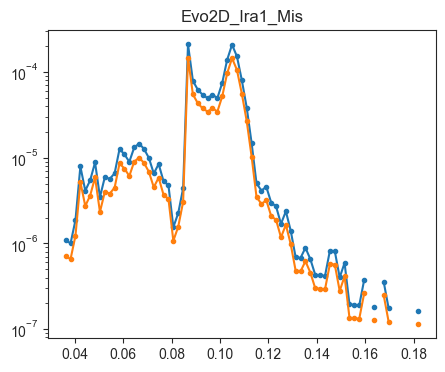

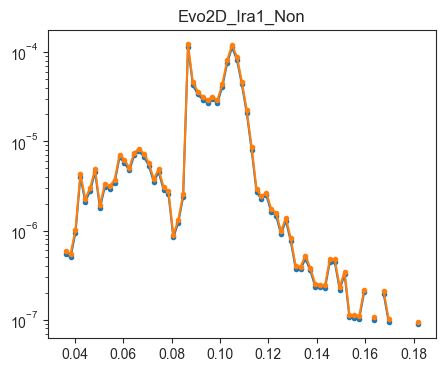

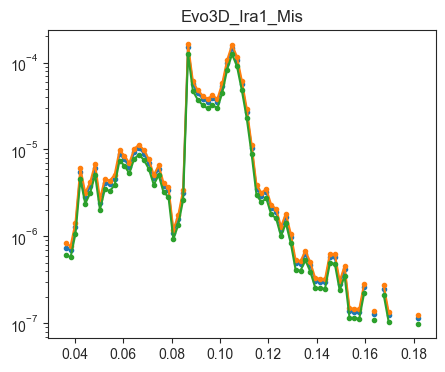

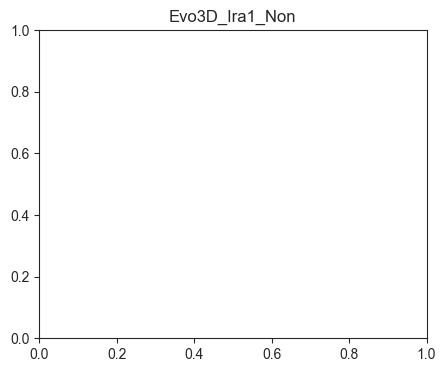

In [271]:

n0 = 1000
c = 2

def tstar(s,mean_fitness,used_timepoints,tstar_interpolation):

    if s > max(mean_fitness):
        return used_timepoints[-1]

    else:
        return tstar_interpolation(s)
    
def time_occurence_function(t,s,unadaptive_interpolation):
    
#     print(t,s)
    return np.exp(-np.exp(-s*t))*unadaptive_interpolation(t)


s_space = np.linspace(s_min,s_max,int((s_max-s_min)/delta_s))

for condition,reps in condition_properties.items():
    plt.figure(figsize=(5,4))
    plt.title(condition)
    
    for rep,timepoints in reps.items():
        
#         plt.subplot(1,2,rep)
        
        this_fit_mut = fitmuts_big[f'{condition}_{rep}']
        mean_fitness = mean_fitness_big[f'{condition}_{rep}']
        used_timepoints = used_timepoints_big[f'{condition}_{rep}']
        these_freqs = freqs_big[f'{condition}_{rep}']
        
        effective_lineage_size = effective_n/len(this_fit_mut)
        
        used_timepoints = 8*np.asarray(used_timepoints)
    

        unadaptive_ix = np.where(this_fit_mut['Fitness']==0)[0]
        
        print(mean_fitness)

        mean_fitness_interpolation = scipy.interpolate.interp1d(used_timepoints,mean_fitness,kind=1)

        # returns time associated with mean fitness of s
        mean_fitness_inverse_interpolation = scipy.interpolate.interp1d(mean_fitness,used_timepoints,kind=1)

        unadaptive_interpolation = scipy.interpolate.interp1d(used_timepoints,np.nansum(these_freqs[unadaptive_ix,:],axis=0),kind=1)


        tstar_interpolation = scipy.interpolate.interp1d(mean_fitness,used_timepoints-np.log(effective_lineage_size*mean_fitness/c))
        
        probs = []
        for s in s_space:

            time_to_occur = scipy.integrate.quad(time_occurence_function,
                                                 0,tstar(s,mean_fitness,used_timepoints,tstar_interpolation),
                                                args=(s,unadaptive_interpolation))

            adaptives_here = adaptives[adaptives['Fitness'].between(s,s+delta_s)]
            
            if len(adaptives_here) > 0:
                prob = len(adaptives_here)/(delta_s * (s/c) * effective_n * time_to_occur[0])
                probs.append(prob)
            else:
                probs.append(np.nan)
                
        print(probs)
            
        plt.errorbar(s_space,probs,
             marker='.',
             linestyle='-')
        
        plt.yscale('log')
        
    plt.savefig(f'{figure_directory}/mutation_rate_spectrum_TimeOpportunity_{condition}.pdf',bbox_inches='tight')

Fitness  Establishment_Time  Error_Fitness  Error_Establishment_Time  \
0       0.000000            0.000000       0.000000                  0.000000   
1       0.081169          117.052472       0.026180                 38.397822   
2       0.096882          199.000000       0.059316                237.265664   
3       0.000000            0.000000       0.000000                  0.000000   
4       0.000000            0.000000       0.000000                  0.000000   
...          ...                 ...            ...                       ...   
116657  0.000000            0.000000       0.000000                  0.000000   
116658  0.000000            0.000000       0.000000                  0.000000   
116659  0.000000            0.000000       0.000000                  0.000000   
116660  0.000000            0.000000       0.000000                  0.000000   
116661  0.000000            0.000000       0.000000                  0.000000   

        Probability_Adaptive  Mean_Fitness  Kappa_Value  Mutant_Cell_Fraction  \
0                   0.199465      0.000049     2.500000              0.001148   
1                   0.523051      0.000070     1.057530              0.001620   
2                   0.503729      0.000184     1.432367              0.004171   
3                   0.243448      0.000506     2.518478              0.011094   
4                   0.107068      0.001513     1.035729              0.031930   
...                      ...           ...          ...                   ...   
116657              0.000066           NaN          NaN                   NaN   
116658              0.000131           NaN          NaN                   NaN   
116659              0.000146           NaN          NaN                   NaN   
116660              0.000274           NaN          NaN                   NaN   
116661              0.000639           NaN          NaN                   NaN   

        Inference_Time  
0            215.74929  
1            228.38766  
2            204.39327  
3            264.09422  
4            245.10992  
...                ...  
116657             NaN  
116658             NaN  
116659             NaN  
116660             NaN  
116661             NaN  

[116662 rows x 9 columns]

<ErrorbarContainer object of 3 artists>

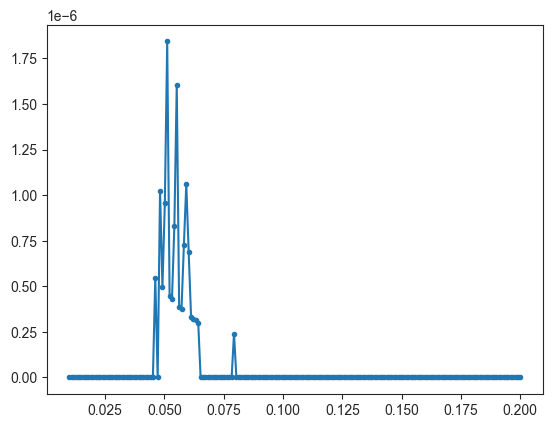

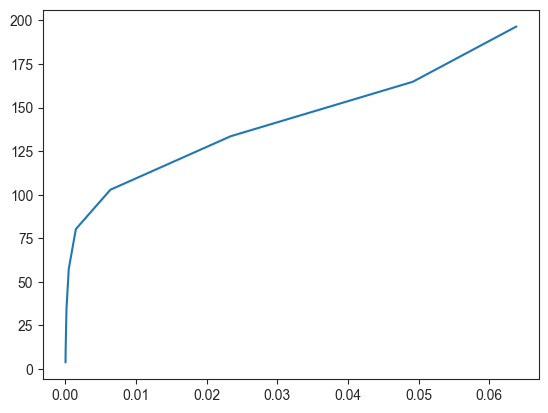

In [218]:
plt.plot(mean_fitness,tstar_interpolation(mean_fitness))

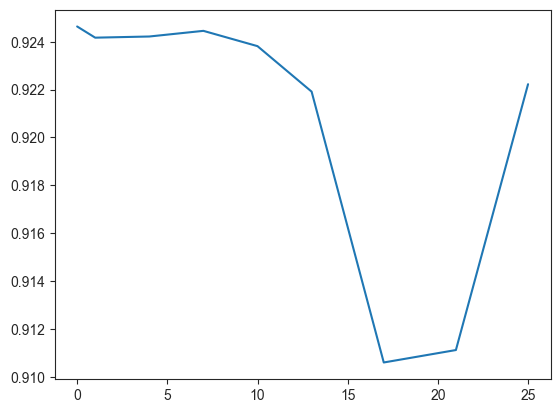

In [192]:
plt.plot(used_timepoints,np.nansum(these_freqs[unadaptive_ix,:],axis=0))

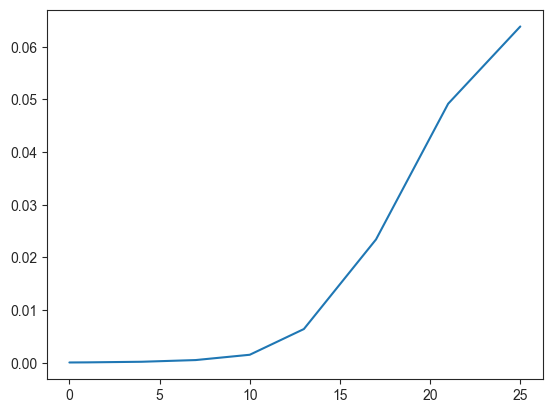

In [200]:
plt.plot(used_timepoints,mean_fitness)

In [112]:
np.sum(these_freqs[interval_lineages,chosen_transfer])

6.361544114576484e-05

In [110]:
interval_lineages

array([ 73, 107, 325, 494, 627, 751, 940])